### Functional tests (ft.csv) - [One record per functional test per task per repetition per time point per visit per subject]

This dataset contains info on:
- Timed 25-Foot Walk (T25FW)
- Nine Hole Peg Test (NHPT) 
- Paced Auditory Serial Addition Test (PASAT)
- Symbol Digit Modalities Test (SDMT)

In [35]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

file_name = 'ft.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
ftests = pd.read_csv(file_path)

C:\Users\lenne\AppData\Local\Temp\ipykernel_3180\118327820.py:16: DtypeWarning: Columns (22,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  ftests = pd.read_csv(file_path)


Check how many missing values we have per column. 

In [36]:
missing_percentage_ftests = (ftests.isnull().sum() / len(ftests)) * 100
missing_ftests = pd.DataFrame({'Column Name': missing_percentage_ftests.index, 'Missing Percentage': missing_percentage_ftests.values})
missing_ftests = missing_ftests.sort_values(by='Missing Percentage', ascending=False)
print(missing_ftests)

   Column Name  Missing Percentage
12       FTPOS          100.000000
34    FTRFTDTC          100.000000
33    FTTPTREF          100.000000
32      FTELTM          100.000000
5      FTREFID          100.000000
6       FTSPID          100.000000
21    FTMETHOD          100.000000
23     FTDRVFL          100.000000
9     FTTSTDTL          100.000000
20       FTNAM          100.000000
24      FTEVAL          100.000000
28       FTDTC           99.741461
19    FTREASND           98.910738
18      FTSTAT           98.466166
22      FTBLFL           96.126469
30       FTTPT           93.224946
31    FTTPTNUM           93.224946
27     VISITDY           84.545236
14    FTORRESU           42.144384
17    FTSTRESU           42.144384
35    FTREPNUM           41.147931
11      FTSCAT           33.508179
4      FTGRPID           33.461774
16    FTSTRESN           27.668258
29        FTDY           24.805267
15    FTSTRESC            1.518089
13     FTORRES            1.518089
1       DOMAIN      

Remove columns with more than 90% missingness as well as redundant columns.

In [37]:
# Set the threshold for missing percentage
threshold = 90

# Filter columns based on missing percentage
columns_to_drop = missing_ftests[missing_ftests['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
ftests = ftests.drop(columns=columns_to_drop)

# Remove redundant columns
ftests = ftests.drop(columns=['STUDYID', 'DOMAIN', 'FTTESTCD', 'FTORRES', 'FTORRESU', 'FTSTRESU'])

In [38]:
ftests.sort_values(by=['USUBJID', 'FTSEQ'], inplace=True)
ftests.head()

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
193389,MSOAC/0014,1,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.5,4.5,2.0,BASELINE,NaN,NaN,1.0
193354,MSOAC/0014,2,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.4,4.4,2.0,BASELINE,NaN,NaN,2.0
196691,MSOAC/0014,3,T25FW001,T25FW1-More Than Two Attempts,T25FW,NaN,N,NaN,2.0,BASELINE,NaN,NaN,NaN
192233,MSOAC/0014,4,NHPT001,NHPT01-Time to Complete 9-Hole Peg Test,NHPT,DOMINANT HAND,25.6,25.6,2.0,BASELINE,NaN,NaN,1.0
191936,MSOAC/0014,5,NHPT001,NHPT01-Time to Complete 9-Hole Peg Test,NHPT,DOMINANT HAND,23.7,23.7,2.0,BASELINE,NaN,NaN,2.0


Overview of all dropped columns:

- **STUDYID**: Study Identifier (irrelevant - always the same value)
- **DOMAIN**: Domain Abbreviation (irrelevant - always the same value)
- **FTTESTCD**: Functional Test Short Name (contains the same info as "FTTEST" = Functional Test Name)
- **FTORRES**: Finding in Original Units (contains the same info as "FTSTRESC" = Character Result/Finding in Std Format, except that there can be incosistencies in the values of FTORRES e.g. Y Yes YES used interchangeably for the same thing)
- **FTORRESU, FTSTRESU**: Original & Standard units (seconds in both cases)
- **FTPOS, FTRFTDTC, FTTPTREF, FTELTM, FTREFID, FTSPID, FTMETHOD, FTDRVFL, FTTSTDTL, FTNAM, FTEVAL**: all values missing and not even mentioned in the data dictionary 
- **FTDTC**: Date/Time of Finding (missing for 99.7% of observations)
- **FTREASND**: Reason Not Performed (missing for 98.9% of observations) **(keep in mind for extreme observations)**
- **FTSTAT**: Completion Status (missing for 98.5% of observations)
- **FTBLFL**: Baseline Flag (missing for 96.1% of observations)
- **FTTPT, FTTPTNUM**: Planned Time Point Name & Number (missing for 93.2% of observations)

In [39]:
unique_usubjid_count = ftests['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 2465


**We have data on all 2465 patients for the functional tests.**

Which columns are numeric and categorical? (see also SDTM fields in Data Dictionary)

In [40]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in ftests.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,FTSEQ,numeric
2,FTGRPID,categorical
3,FTTEST,categorical
4,FTCAT,categorical
5,FTSCAT,categorical
6,FTSTRESC,categorical
7,FTSTRESN,numeric
8,VISITNUM,numeric
9,VISIT,categorical


- Descriptive statistics for numeric variables

In [41]:
numeric_columns = ['FTSEQ', 'FTSTRESN', 'VISITNUM', 'VISITDY', 'FTDY', 'FTREPNUM']

descriptive_numeric = {
    'Count': ftests[numeric_columns].count(), 
    'Missing Cases': ftests[numeric_columns].isna().sum(),
    'Missing %': round((ftests[numeric_columns].isna().sum() / len(ftests)) * 100, 2),  
    'Median': ftests[numeric_columns].median(),
    'Standard Deviation': ftests[numeric_columns].std()
}

num_ftests = pd.DataFrame(descriptive_numeric)
num_ftests

,Count,Missing Cases,Missing %,Median,Standard Deviation
FTSEQ,241356,0,0.00,51.0,38.113581
FTSTRESN,174577,66779,27.67,22.0,20.327130
VISITNUM,241356,0,0.00,11.0,205.031511
VISITDY,37301,204055,84.55,268.0,251.544301
FTDY,181487,59869,24.81,173.0,295.597788
FTREPNUM,142043,99313,41.15,1.0,0.500016


- FTSEQ (Sequence number)

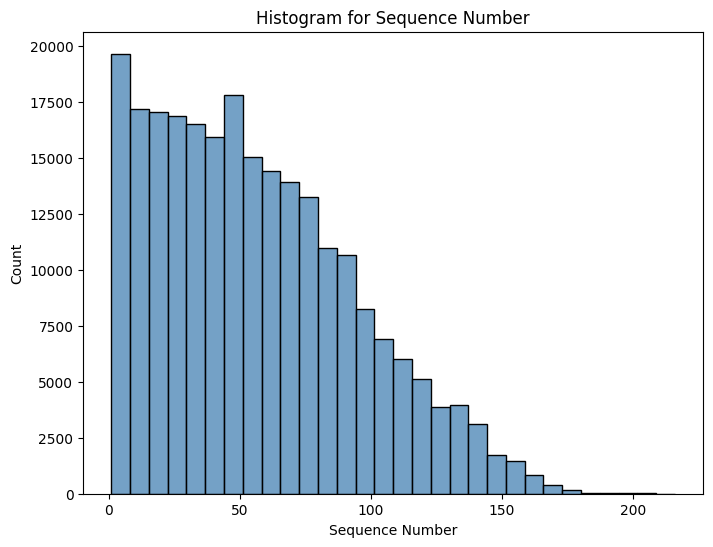

In [42]:
FTSEQ = ftests['FTSEQ'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(FTSEQ, kde=False, color='steelblue', bins=30)
plt.xlabel('Sequence Number')
plt.ylabel('Count')
plt.title('Histogram for Sequence Number')
plt.show()

- FTSTRESN (Numeric Result/Finding in Standard Units)

**NOTE:** This column gives the results for the functional tests with a numeric outcome. For this reason, we need to make a separate plot for each unique functional test name (FTTEST), but only the ones that have a numeric outcome.

**Need to check this with R&F because according to a paper, the convention for patients unable to perform is: 180 sec for T25FW & 300 sec for 9HPT - but in this dataset there are some values even larger than this?**

In [43]:
# Define the 'FTTEST' values with a numeric outcome
num_FTTEST_values = [
    'T25FW1-Time to Complete 25-Foot Walk',
    'NHPT01-Time to Complete 9-Hole Peg Test',
    'PASAT1-Total Correct',
    'SDMT01-Total Score'
]

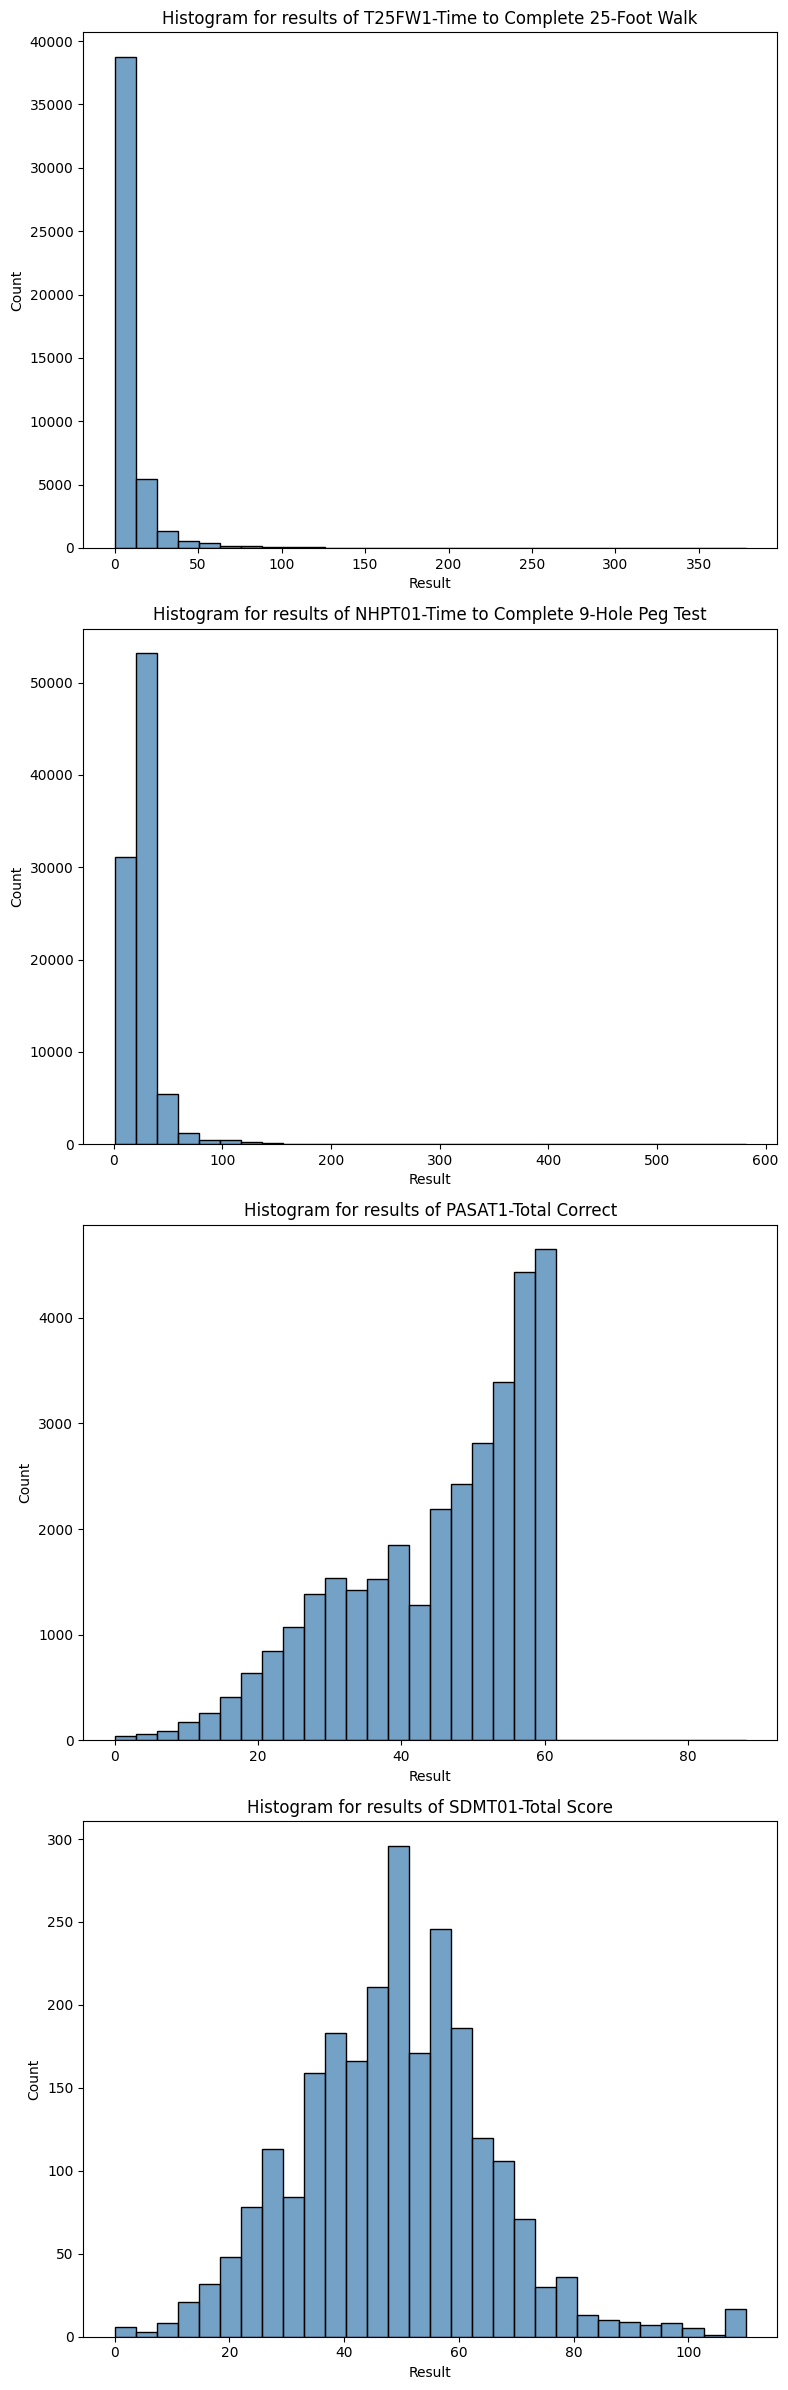

In [44]:
# Barcharts
fig, axes = plt.subplots(nrows=len(num_FTTEST_values), figsize=(8, 6 * len(num_FTTEST_values)))

# Iterate over numeric FTTEST values
for i, fttest_value in enumerate(num_FTTEST_values):
    subset_data = ftests[ftests['FTTEST'] == fttest_value]
    
    # Create histogram for the subset
    sns.histplot(subset_data['FTSTRESN'].dropna(), kde=False, color='steelblue', bins=30, ax=axes[i])
    
    # Customize subplot
    axes[i].set_xlabel('Result')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Histogram for results of {fttest_value}')

plt.tight_layout()
plt.show()

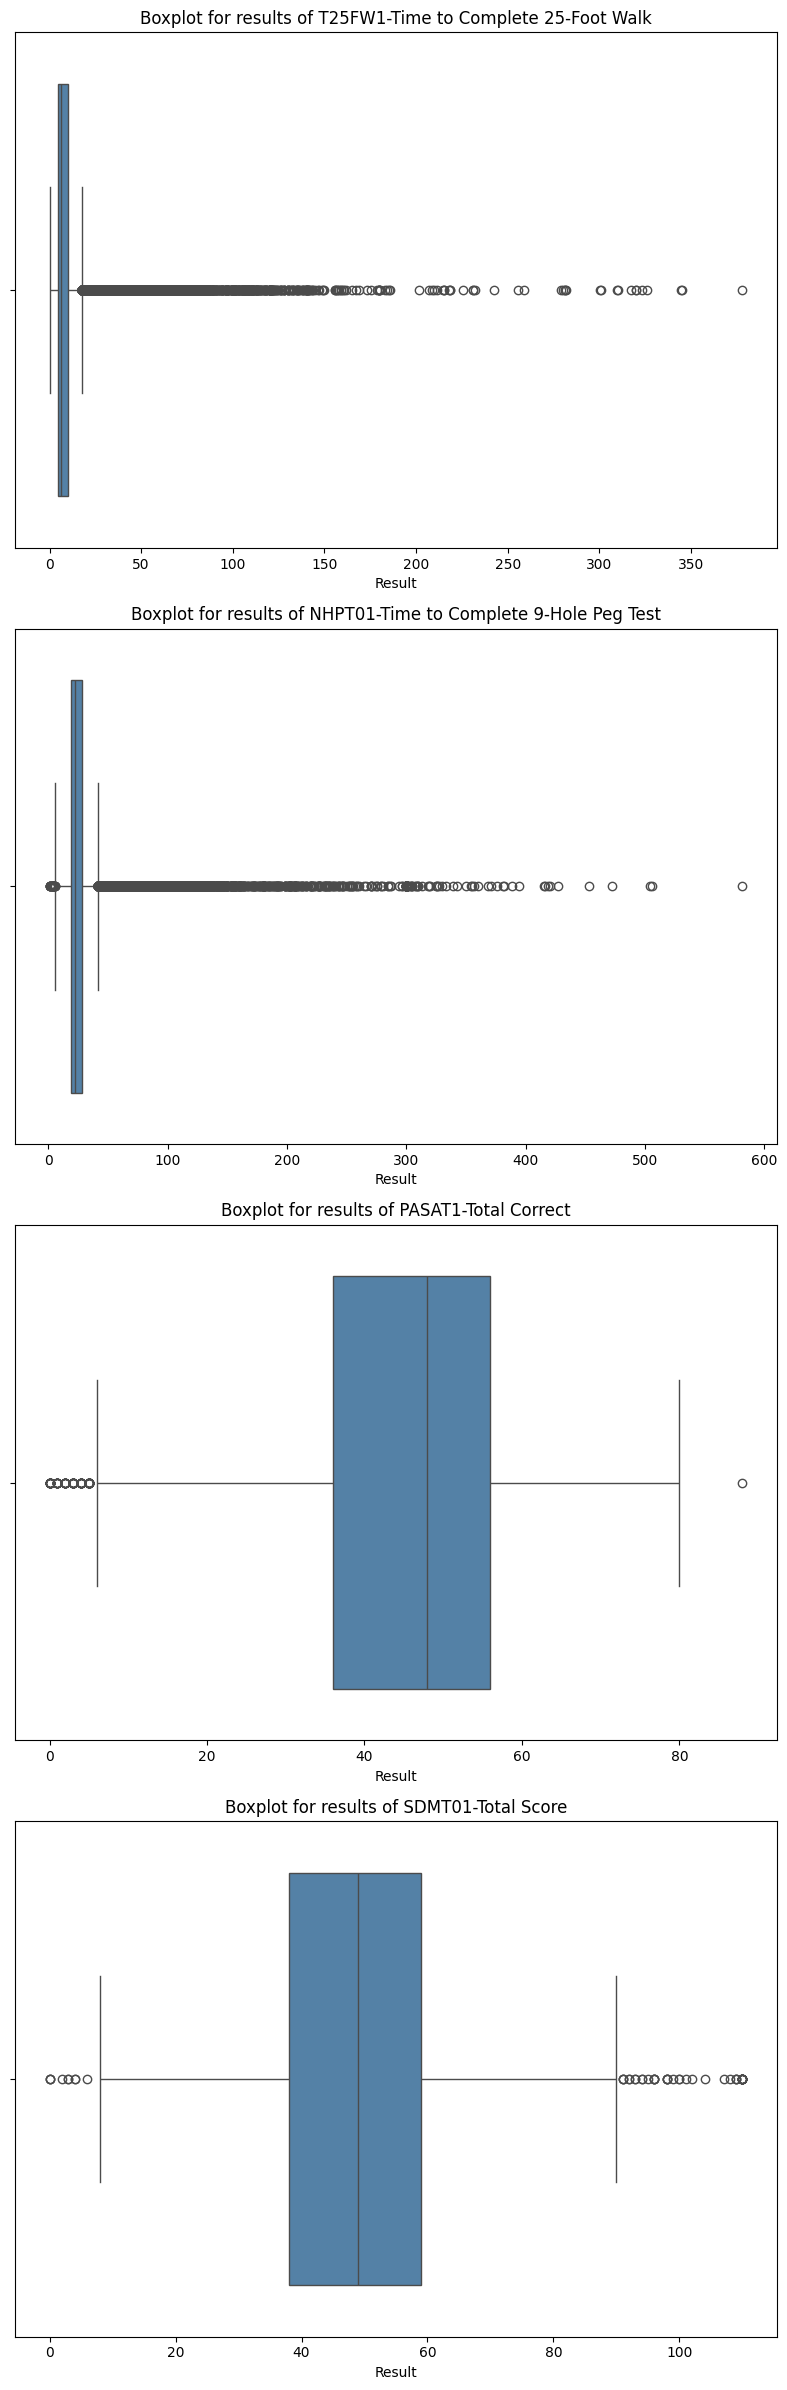

In [45]:
fig, axes = plt.subplots(nrows=len(num_FTTEST_values), figsize=(8, 6 * len(num_FTTEST_values)))

# Iterate over numeric FTTEST values
for i, fttest_value in enumerate(num_FTTEST_values):
    subset_data = ftests[ftests['FTTEST'] == fttest_value]
    
    # Create horizontal boxplot for the subset
    sns.boxplot(x=subset_data['FTSTRESN'].dropna(), color='steelblue', ax=axes[i])
    
    # Customize subplot
    axes[i].set_xlabel('Result')
    axes[i].set_title(f'Boxplot for results of {fttest_value}')

plt.tight_layout()
plt.show()

- VISITNUM (Visit Number)

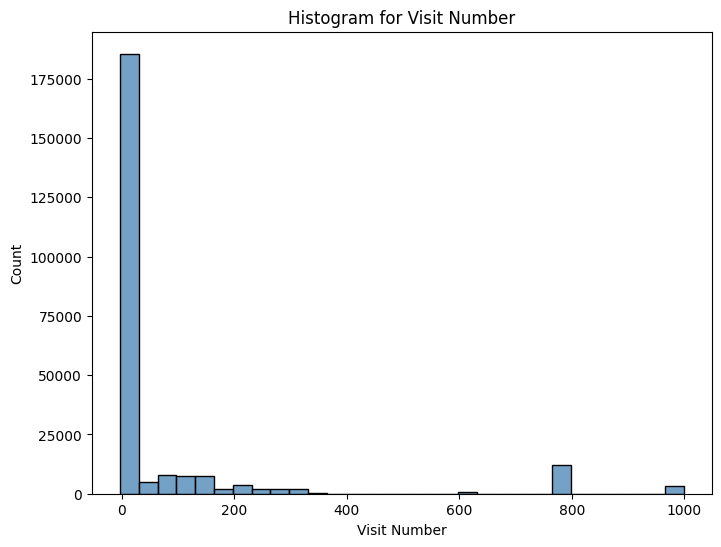

In [46]:
VISITNUM_ftests = ftests['VISITNUM'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(VISITNUM_ftests, kde=False, color='steelblue', bins=30)
plt.xlabel('Visit Number')
plt.ylabel('Count')
plt.title('Histogram for Visit Number')
plt.show()

- VISITDY (Visit Day)  

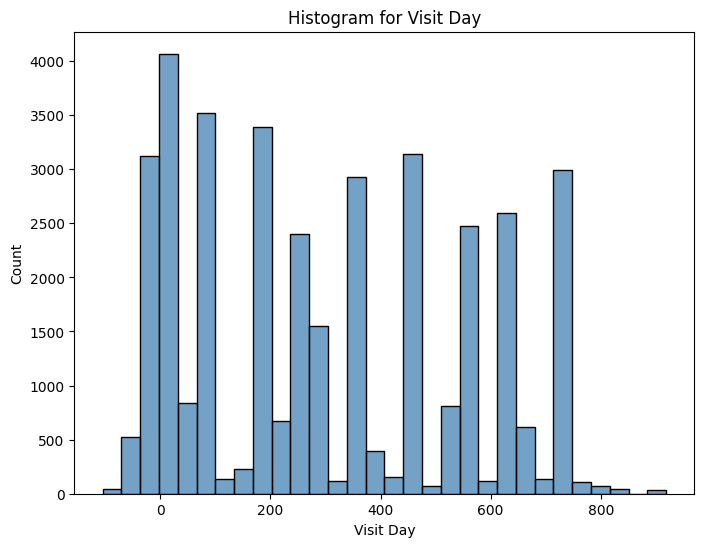

In [47]:
VISITDY_ftests = ftests['VISITDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(VISITDY_ftests, kde=False, color='steelblue', bins=30)
plt.xlabel('Visit Day')
plt.ylabel('Count')
plt.title('Histogram for Visit Day')
plt.show()

- FTDY (Study Day of Collection)

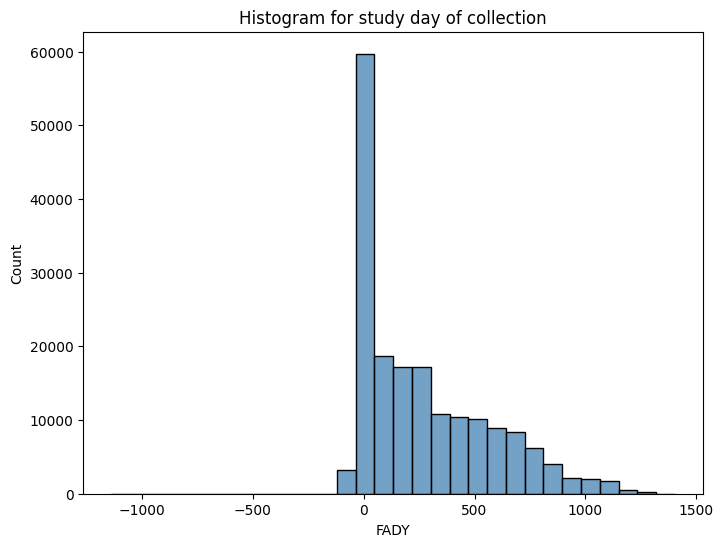

In [48]:
FADY = ftests['FTDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(FADY, kde=False, color='steelblue', bins=30)
plt.xlabel('FADY')
plt.ylabel('Count')
plt.title('Histogram for study day of collection')
plt.show()

- FTREPNUM (Repetition Number) is discrete

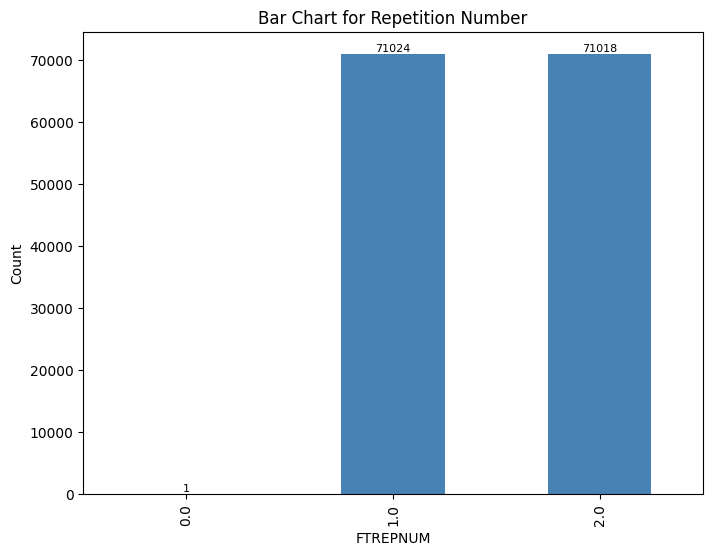

In [49]:
FTREPNUM_ftests = ftests['FTREPNUM'].dropna()

plt.figure(figsize=(8, 6))
ax = FTREPNUM_ftests.value_counts().sort_index().plot(kind='bar', color='steelblue')  # Sorting the index

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('FTREPNUM')
plt.ylabel('Count')
plt.title('Bar Chart for Repetition Number')
plt.show()

Only 1 row seems to have a repetition number of 0, might be a data entry error. Looking at this row shows that it is the measurement of the Time to Complete 25-Foot Walk for patient with ID 7430. The value for the test outcome is missing. 

In [50]:
row_with_ftrepnum_0 = ftests[ftests['FTREPNUM'] == 0]
row_with_ftrepnum_0

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
213718,MSOAC/7430,51,T25FW006,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,NaN,NaN,11.0,V11 - MONTH 18,NaN,NaN,0.0


In [51]:
filtered_rows = ftests[(ftests['FTTEST'] == 'T25FW1-Time to Complete 25-Foot Walk') & (ftests['USUBJID'] == 'MSOAC/7430')]
filtered_rows

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
185627,MSOAC/7430,1,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.9,4.9,1.0,V1 - SCREENING,NaN,NaN,1.0
185448,MSOAC/7430,2,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.5,4.5,1.0,V1 - SCREENING,NaN,NaN,2.0
185685,MSOAC/7430,11,T25FW002,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,5,5.0,1.0,V1 - SCREENING,NaN,NaN,1.0
185580,MSOAC/7430,12,T25FW002,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.8,4.8,1.0,V1 - SCREENING,NaN,NaN,2.0
193384,MSOAC/7430,21,T25FW003,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.4,4.4,2.0,V2 - BASELINE,NaN,NaN,1.0
193477,MSOAC/7430,22,T25FW003,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.6,4.6,2.0,V2 - BASELINE,NaN,NaN,2.0
199076,MSOAC/7430,31,T25FW004,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4,4.0,7.0,V7 - MONTH 6,NaN,NaN,1.0
199077,MSOAC/7430,32,T25FW004,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4,4.0,7.0,V7 - MONTH 6,NaN,NaN,2.0
205902,MSOAC/7430,41,T25FW005,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.2,4.2,9.0,V9 - MONTH 12,NaN,NaN,1.0
205903,MSOAC/7430,42,T25FW005,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.2,4.2,9.0,V9 - MONTH 12,NaN,NaN,2.0


Upon inspection, it seems that the repetition number of 0 needed to be a 1 instead.

In [52]:
row_with_ftrepnum_0 = ftests[ftests['FTREPNUM'] == 0]
ftests.loc[row_with_ftrepnum_0.index, 'FTREPNUM'] = 1

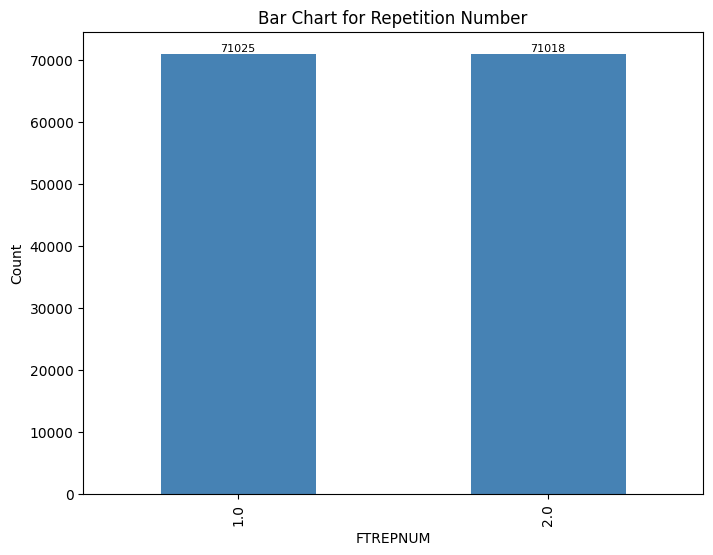

In [53]:
FTREPNUM_ftests = ftests['FTREPNUM'].dropna()

plt.figure(figsize=(8, 6))
ax = FTREPNUM_ftests.value_counts().sort_index().plot(kind='bar', color='steelblue')  # Sorting the index

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('FTREPNUM')
plt.ylabel('Count')
plt.title('Bar Chart for Repetition Number')
plt.show()

- Descriptive statistics for categorical variables

In [54]:
categorical_columns = ['FTGRPID', 'FTTEST', 'FTCAT', 'FTSCAT', 'FTSTRESC', 'VISIT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': ftests[col].count(),
        'Missing Cases': ftests[col].isna().sum(),
        'Missing %': round((ftests[col].isna().sum() / len(ftests)) * 100, 2),
        'Unique Values': ftests[col].nunique(),
        'Mode': ftests[col].mode().values[0],
        'Mode Frequency': ftests[col].value_counts().max()
    }

cat_ftests = pd.DataFrame(descriptive_categorical).T
cat_ftests

,Count,Missing Cases,Missing %,Unique Values,Mode,Mode Frequency
FTGRPID,160594,80762,33.46,54,NHPT001,7623
FTTEST,241356,0,0.0,9,NHPT01-Time to Complete 9-Hole Peg Test,93741
FTCAT,241356,0,0.0,4,NHPT,123559
FTSCAT,160482,80874,33.51,4,DOMINANT HAND,61836
FTSTRESC,237692,3664,1.52,1669,N,62617
VISIT,241356,0,0.0,99,SCREENING,17056


- Number of observations for each FTGRPID (group ID) category

In [55]:
FTGRPID_counts = ftests['FTGRPID'].value_counts().reset_index()
FTGRPID_counts.columns = ['FTGRPID', 'Count']
FTGRPID_counts = FTGRPID_counts.sort_values(by='FTGRPID')
FTGRPID_counts

,FTGRPID,Count
0,NHPT001,7623
1,NHPT002,7497
2,NHPT003,7364
3,NHPT004,7150
5,NHPT005,6878
9,NHPT006,6325
12,NHPT007,5677
26,NHPT008,2418
29,NHPT009,1945
33,NHPT010,1602


13 NHPT groups, 20 PASAT groups, 21 T25FW groups ('groups' means here how many times a test was maximally repeated for the same patient) - no groups for SDMT: maximally performed once for each patient

- Number of observations for each FTTEST (functional test name) category

In [56]:
FTTEST_counts = ftests['FTTEST'].value_counts().reset_index()
FTTEST_counts.columns = ['FTTEST', 'Count']
FTTEST_counts = FTTEST_counts.sort_values(by='FTTEST')
FTTEST_counts

,FTTEST,Count
8,Functional Test,129
3,NHPT01-More Than Two Attempts,29782
0,NHPT01-Time to Complete 9-Hole Peg Test,93741
5,PASAT1-More Than One Attempt,13426
2,PASAT1-Total Correct,33511
6,SDMT01-Total Score,2444
7,T25FW1-Complete Two Successful Trials,208
4,T25FW1-More Than Two Attempts,19702
1,T25FW1-Time to Complete 25-Foot Walk,48413


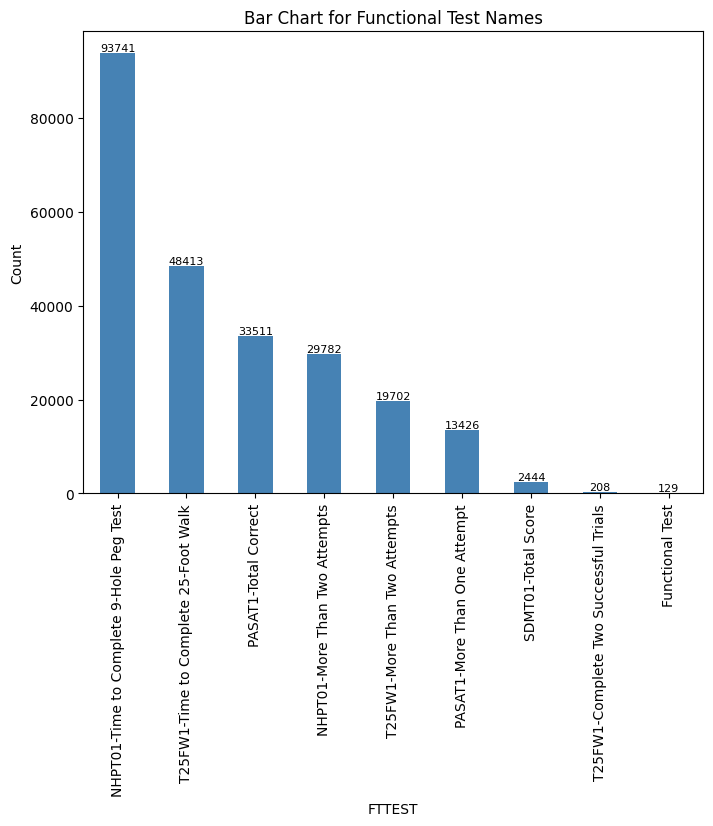

In [57]:
plt.figure(figsize=(8, 6))
ax = ftests['FTTEST'].value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('FTTEST')
plt.ylabel('Count')
plt.title('Bar Chart for Functional Test Names')
plt.show()

- Number of observations for each FTCAT (category of functional test) category

In [58]:
FTCAT_counts = ftests['FTCAT'].value_counts().reset_index()
FTCAT_counts.columns = ['FTCAT', 'Count']
FTCAT_counts

,FTCAT,Count
0,NHPT,123559
1,T25FW,68377
2,PASAT,46976
3,SDMT,2444


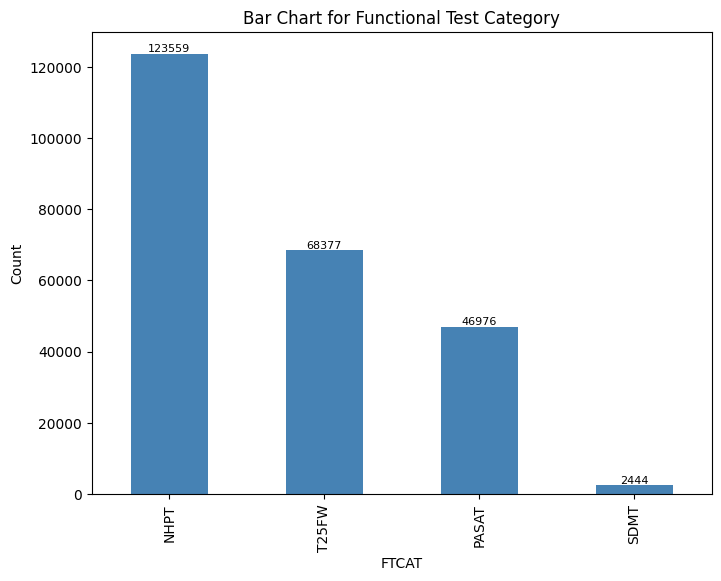

In [59]:
plt.figure(figsize=(8, 6))
ax = ftests['FTCAT'].value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('FTCAT')
plt.ylabel('Count')
plt.title('Bar Chart for Functional Test Category')
plt.show()

- Number of observations for each FTSCAT (subcategory of functional test) category

In [60]:
FTSCAT_counts = ftests['FTSCAT'].value_counts().reset_index()
FTSCAT_counts.columns = ['FTSCAT', 'Count']
FTSCAT_counts = FTSCAT_counts.sort_values(by='FTSCAT')
FTSCAT_counts

,FTSCAT,Count
3,2 SECONDS,10061
2,3 SECONDS,26898
0,DOMINANT HAND,61836
1,NON-DOMINANT HAND,61687


In [69]:
# Create a cross-tabulation for FTSCAT and FTTEST
cross_table = pd.crosstab(index=ftests['FTSCAT'], columns=ftests['FTTEST'])
cross_table

FTTEST,NHPT01-More Than Two Attempts,NHPT01-Time to Complete 9-Hole Peg Test,PASAT1-More Than One Attempt,PASAT1-Total Correct
FTSCAT,,,,
2 SECONDS,0,0,0,10061
3 SECONDS,0,0,3448,23450
DOMINANT HAND,14917,46919,0,0
NON-DOMINANT HAND,14865,46822,0,0


- Number of observations for each FTSTRESC (Character Result/Finding in Std Format) category

**NOTE:** This column gives the results for functional tests with both a numeric and categorical outcome. However, the numeric values are not formatted in a standardized way, only the categorical ones are. Since we already looked at the numeric outcomes in FTSTRESN, we will focus only on the categorical outcomes for this variable.

In [61]:
FTSTRESC_counts = ftests['FTSTRESC'].value_counts().reset_index()
FTSTRESC_counts.columns = ['FTSTRESC', 'Count']
FTSTRESC_counts
# contains both yes/no and numbers, should be looked at together with FTTEST!

,FTSTRESC,Count
0,N,62617
1,60,2809
2,59,2004
3,58,1709
4,57,1532
...,...,...
1664,210.5,1
1665,232.6,1
1666,354.7,1
1667,183.9,1


In [62]:
# Define the 'FTTEST' values with a categorical outcome
cat_FTTEST_values = [
    'T25FW1-Complete Two Successful Trials',
    'T25FW1-More Than Two Attempts',
    'NHPT01-More Than Two Attempts',
    'PASAT1-More Than One Attempt',
]

In [63]:
# Filter the DataFrame based on cat_FTTEST_values
filtered_ftests = ftests[ftests['FTTEST'].isin(cat_FTTEST_values)]

# Create a cross-tabulation for counts
counts_table = pd.crosstab(index=filtered_ftests['FTTEST'], columns=filtered_ftests['FTSTRESC'], margins=True, margins_name='Total')
counts_table

FTSTRESC,N,Y,Total
FTTEST,,,
NHPT01-More Than Two Attempts,29619,163,29782
PASAT1-More Than One Attempt,13368,58,13426
T25FW1-Complete Two Successful Trials,0,208,208
T25FW1-More Than Two Attempts,19630,69,19699
Total,62617,498,63115


When FTTEST = Functional Test, the outcomes are always missing. We do have the category saying which functional test it refers to, but don't know if it's time to completion or more than x attempts. Maybe it's best to remove these?

In [64]:
functional_test_rows = ftests[ftests['FTTEST'] == 'Functional Test']
functional_test_rows

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
176140,MSOAC/0757,138,T25FW014,Functional Test,T25FW,NaN,NaN,NaN,997.0,EARLY/TERMINATION,NaN,905.0,NaN
18756,MSOAC/1266,1,NaN,Functional Test,NHPT,NaN,NaN,NaN,-3.0,SCREENING -3,NaN,-34.0,NaN
18757,MSOAC/1266,2,PASAT001,Functional Test,PASAT,NaN,NaN,NaN,-3.0,SCREENING -3,NaN,-34.0,NaN
18770,MSOAC/1266,3,T25FW001,Functional Test,T25FW,NaN,NaN,NaN,-3.0,SCREENING -3,NaN,-34.0,NaN
152566,MSOAC/1814,101,NaN,Functional Test,NHPT,NaN,NaN,NaN,21.0,MONTH 21,NaN,624.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35718,MSOAC/9536,13,T25FW002,Functional Test,T25FW,NaN,NaN,NaN,-2.0,SCREENING -2,NaN,-14.0,NaN
156434,MSOAC/9572,105,T25FW010,Functional Test,T25FW,NaN,NaN,NaN,21.0,MONTH 21,NaN,642.0,NaN
63985,MSOAC/9781,25,T25FW010,Functional Test,T25FW,NaN,NaN,NaN,9.2,VISIT 7: HOUR 1,NaN,64.0,NaN
64060,MSOAC/9781,26,T25FW011,Functional Test,T25FW,NaN,NaN,NaN,9.3,VISIT 7: HOUR 2,NaN,64.0,NaN


In [65]:
unique_FTSTRESN = functional_test_rows['FTSTRESN'].unique()
unique_FTSTRESC = functional_test_rows['FTSTRESC'].unique()

print(f"Unique FTSTRESN values: {unique_FTSTRESN}")
print(f"\nUnique FTSTRESC values: {unique_FTSTRESC}")


Unique FTSTRESN values: [nan]

Unique FTSTRESC values: [nan]


In [66]:
(129/len(ftests))*100 #only 0.05% - can we just remove these obs?

0.05344801869437677

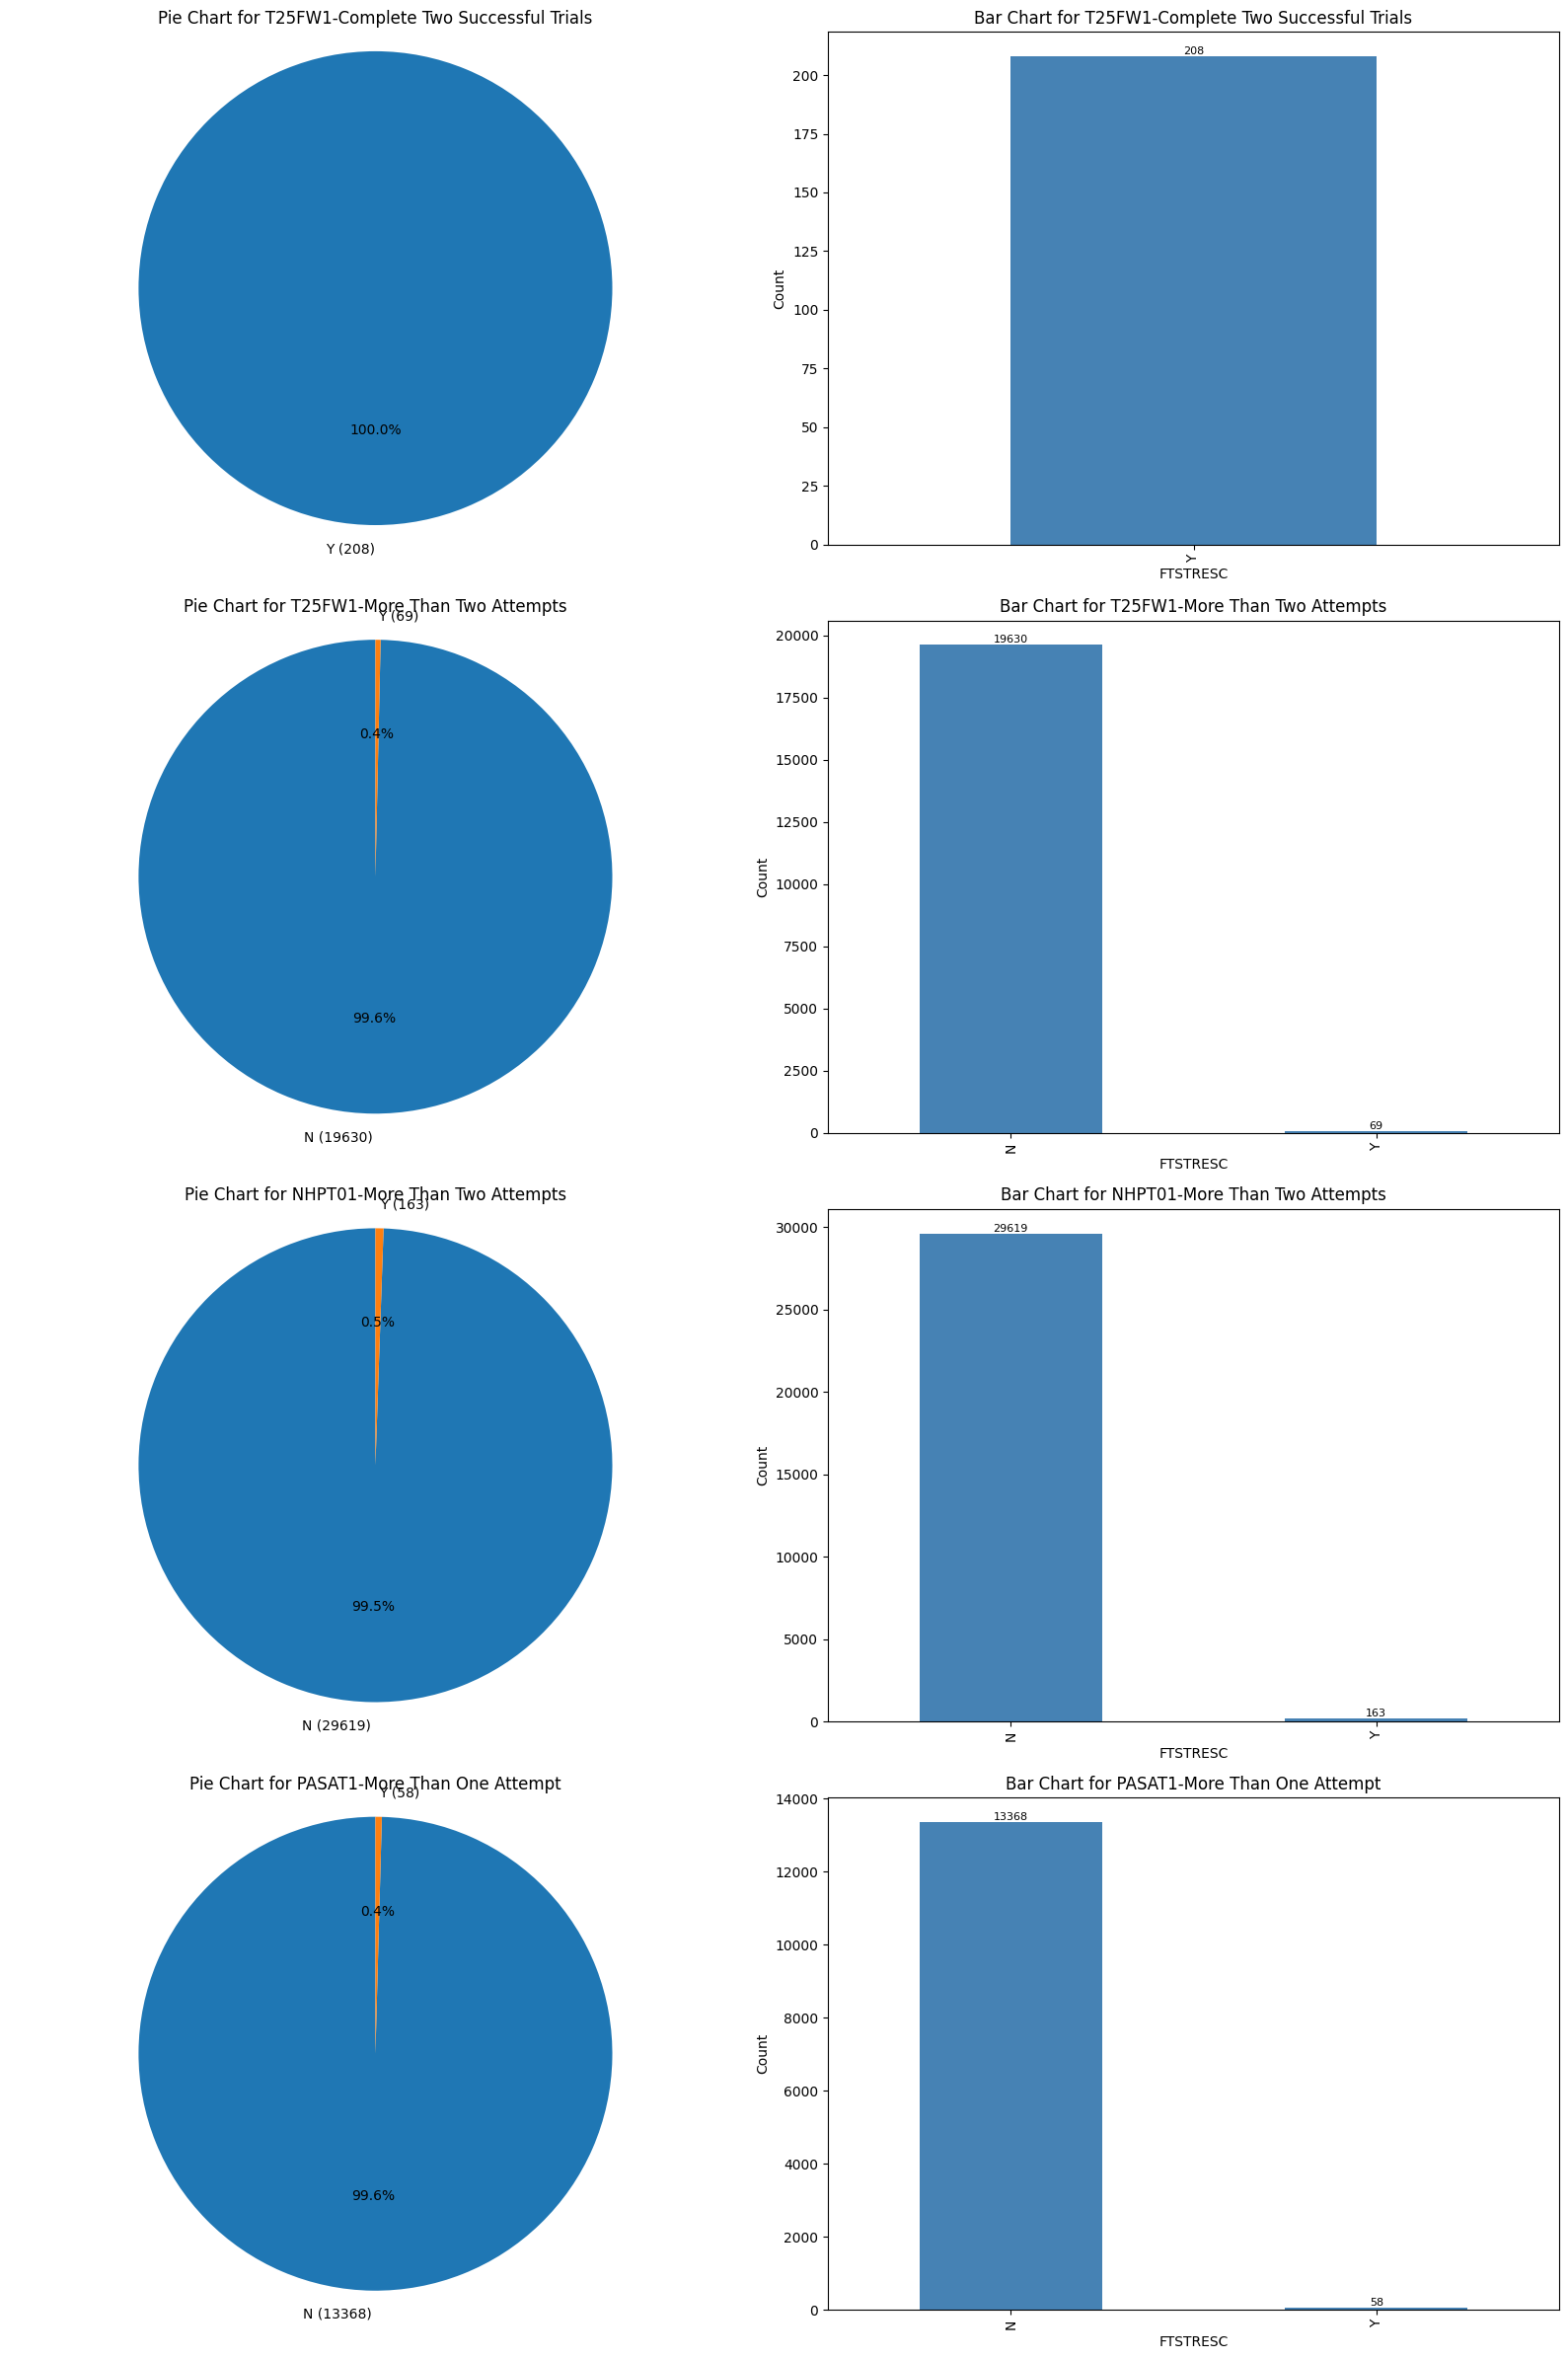

In [67]:
fig, axes = plt.subplots(nrows=len(cat_FTTEST_values), ncols=2, figsize=(16, 6 * len(cat_FTTEST_values)))

# Iterate over categorical FTTEST values
for i, fttest_value in enumerate(cat_FTTEST_values):
    subset_data_fttest = ftests[ftests['FTTEST'] == fttest_value]
    
    # Pie chart for FTSTRESC
    category_counts_ftstresc = subset_data_fttest['FTSTRESC'].value_counts()
    if not category_counts_ftstresc.empty:
        percentages = category_counts_ftstresc / category_counts_ftstresc.sum() * 100
        labels = [f"{category} ({count})" for category, count in zip(category_counts_ftstresc.index, category_counts_ftstresc)]
        
        axes[i, 0].pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
        axes[i, 0].axis('equal')
        axes[i, 0].set_title(f'Pie Chart for {fttest_value}')

    # Bar chart for FTSTRESC
    if not category_counts_ftstresc.empty:
        ax = subset_data_fttest['FTSTRESC'].value_counts().plot(kind='bar', color='steelblue', ax=axes[i, 1])
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)
        axes[i, 1].set_xlabel('FTSTRESC')
        axes[i, 1].set_ylabel('Count')
        axes[i, 1].set_title(f'Bar Chart for {fttest_value}')

plt.tight_layout()
plt.show()

- Number of observations for each VISIT (Visit Name) category 

In [68]:
VISIT_counts = ftests['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

,VISIT,Count
0,SCREENING,17056
1,BASELINE,12829
2,V1 - SCREENING,8211
3,WEEK 12,7847
4,WEEK 24,7670
...,...,...
94,WEEK 128,35
95,RELAPSE VISIT 4,34
96,MONTH 48,30
97,RELAPSE VISIT 5,23
